# Анализ оттока клиентов банка

## Описание проекта

В нашем распоряжение данные по клиентам "Метанпром" банка, предоставленные отделом маркетинга. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 

<b>Цели исследования:</b> проанализировать клиентов регионального банка, выделите сегменты клиентов, которые склонны уходить из банка и подготовить рекомендации по удержанию клиентов банка для отдела маркетинга.

<b>Ретроспектива</b> - ранее было проведено исследование оттока, составлены дэшборды и выделены сегменты, но клиентская база поменялась, и текущие решения не работают.

<b>Задачи проекта:</b>
1. Исследование данных, поиск закономерностей;
2. Составление портретов клиентов;
3. Проверка статистических гипотез;
4. Составление сегментов клиентов и их приоритизация;
5. Подготовка выводов, рекомендаций и презентацию для отдела маркетинга.

### Ход исследования

Данные о клиентах банка получены от заказчика в виде csv файла bank_scrooge.csv. О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, потребуется провести обзор и предобработку данных.

Поэтому в исследование войдут следующие этапы:

Этап 1. Загрузка с данных и изучение общей информации.

Этап 2. Предобработка и подготовка данных
- Проверка корректности наименования колонок;
- Исследование пропущенных значений;
- Исследование соответствия типов;
- Исследование дубликатов;
- Удаление дубликатов;
- Приведение типов данных в столбцах;
- Замена пропущенных значений.
- Кодирование данных для использования в анализа корреляции.

Этап 3. Исследовательский анализ данных
- Анализ распределения признаков, в том числе в разрезе оттока, по следующим признакам: город, пол, возраст, наличие кредитной карты и активность клиента;
- Анализ портретов клиентов в разрезе оттока;
- Корреляционный анализ.

Этап 4. Проверка статистических гипотез
- Выдвижение и проверка первой гипотезы;
- Выдвижение и проверка второй гипотезы;

Этап 5. Подведение промежуточных итогов по результатам анализа и проверки статестических гипотез.

Этап 6. Сегментация и приоритизация пользователей.

Этап 7. Формирование рекомендаций по результатом исследования.

Этап 8. Подготовка дашборда и презентацию для отдела маркетинга.

## Обзор данных

In [65]:
# Python модули
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
try:
    import phik as ph
except:
    !pip install phik
    import phik as ph
from scipy import stats as st
import random
# импортируем карту и маркер
import folium.plugins as fl_plug
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
# Конвертеры, которые позволяют использовать типы pandas в matplotlib  
pd.options.mode.chained_assignment = None
# Изменение кол-ва символов в ячейке
pd.options.display.max_colwidth = 120


In [66]:
# Загрузка данных в датасет
try: 
    bank_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F', 
                            sep=',')
except:
    print('Error in upload data')

In [67]:
# Данные в датасете
bank_data.info()
bank_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [68]:
# Количество записей
bank_data_count = len(bank_data)
print('Всего записей:',bank_data_count)
# Количество уникальных пользователей
print('Всего пользователей:',len(bank_data['USERID'].unique()))

Всего записей: 10000
Всего пользователей: 9927


In [69]:
# Посмотрим статистику по числовым столбцам
bank_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.71,33708.24,94561.0,142810.25,172728.0,201261.75,2.291450e+05
score,10000.0,848.70,65.45,642.0,802.00,853.0,900.00,1.000000e+03
age,9974.0,42.73,12.18,18.0,33.00,40.0,51.00,8.600000e+01
equity,10000.0,2.63,1.98,0.0,0.00,3.0,4.00,9.000000e+00
balance,7705.0,827794.31,1980614.15,0.0,295554.16,524272.2,980705.85,1.191136e+08
products,10000.0,1.87,0.79,0.0,1.00,2.0,2.00,5.000000e+00
credit_card,10000.0,0.68,0.47,0.0,0.00,1.0,1.00,1.000000e+00
last_activity,10000.0,0.52,0.50,0.0,0.00,1.0,1.00,1.000000e+00
EST_SALARY,10000.0,147866.89,139388.51,2546.3,75251.90,119658.1,174500.54,1.395064e+06
churn,10000.0,0.18,0.39,0.0,0.00,0.0,0.00,1.000000e+00


1) Датасет содержит 10K строк в 12 столбцах, с данными о клиентах банка «Метанпром».

2) Столбцы датасета:

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — заработная плата клиента,
- churn — ушёл или нет.

Перед исследование необходимо привести названия столбцов к единому формату.

3) Столбцы age и balance содержат пропуски и требуют исследования.

4) Столбцы credit_card, last_activity, churn имеют булевый тип данных, что необходимо учитывать в ходе анализа данных.

5) Кредитный рейтинг score имеет распределение от 642 до 1000.

6) Возрастная категория age имеет распределение от 18 до 86, что вписывается в требования банка к возрасту клиентов. Средний возраст - 43 года, а медиана - 40, что говорит о минимальном количестве выбросов влияющих на средние значения.

7) Распределение equity для клиентов банка: от 0 до 9. Среднее - 2.63, медиана - 3.

8) Баланс клиентов банка balance распределен от 0 до 119113600 р. Среднее - 827794.3 р., медиана - 524272.2 р. Текущие статистические характеристики говорят о наличие выбросов в сторону максимальных значений.

9) Количество продуктов products распределено от 0 до 5. Среднее - 2, медиана - 2. Необходимо дополнительно посмотреть на клиентов, у которых нет активных банковских продуктов.

10) Заработанная плата EST_SALARY распределяется от 2546.30 р. до 1395064.45 р. Среднее - 147866.89 р., медиана - 119658.10 р. Текущие статистические характеристики говорят о наличие выбросов в сторону максимальных значений.

## Предобработка данных

### Преобразование заголовков столбцов

In [70]:
# Преобразование заголовков столбцов
bank_data.columns = [x.lower() for x in bank_data.columns]
bank_data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Исследование пропущенных значений

In [71]:
# Посмотрим на процент пропущенных значений в столбцах датасета
round(bank_data.isna().sum()/len(bank_data)*100,2)

userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

#### Возраст

In [72]:
# Берем все пропуски в age
age_null = bank_data.query('age.isnull()').userid
print('Количество пропусков:', len(age_null))

Количество пропусков: 26


In [73]:
# Дубликаты пользователей
bad_clients = bank_data.groupby('userid').agg({'city' : 'nunique'}).reset_index().query('city>1')['userid']
if len(bad_clients) > 0:
    print('Дубликаты:', len(bad_clients))
else:
    print('Нет дупликатов')

Дубликаты: 73


In [74]:
# Посмотрим сколько записей без возраста в дубликатах
age_bad_clients = list(set(age_null) & set(bad_clients))
print(len(age_bad_clients))

23


Количество пропусков в столбце age: 26, 23 из которых в дубликатах. Данный тип пропусков - MCAR (Missing Completely At Random / Отсутствует совершенно случайно). Пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их удалить из датасета.

In [75]:
# Очистка датасета от пропусков age
bank_data.dropna(subset = ['age'], inplace=True)

#### Баланс

In [76]:
# Берем все пропуски в balance
balance_null = bank_data.query('balance.isnull()')
print('Количество строк с пропусками в бюджете:', len(balance_null))
balance_not_null =  bank_data[bank_data.balance.notna()]
print('Количество строк без пропусков в бюджете:',len(balance_not_null))

Количество строк с пропусками в бюджете: 2279
Количество строк без пропусков в бюджете: 7695


In [77]:
# Добавим поле с признаком баланса. 1 - в наблюдении пропущено значение признака, 
# 0 - в наблюдении значение признака не пропущено. 
bank_data['balance_nan'] = 0
bank_data.loc[bank_data.balance.isnull(),'balance_nan'] = 1

In [78]:
bank_data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [79]:
# Агрегируем данные и строим сводную таблицу
balance_pivot = bank_data.pivot_table(index='balance_nan', 
                                      aggfunc={'userid': 'count', 
                                               'est_salary': np.mean, 
                                               'age': np.mean, 
                                               'products': np.median, 
                                               'equity': np.median, 
                                               'city': lambda x: x.mode().iat[0], 
                                               'gender': lambda x: x.mode().iat[0]})
# Переименование столбцов
balance_pivot = balance_pivot.rename(columns={
    'age': 'Средний возраст',
    'city': 'Мода по городу',
    'equity': 'Медианное количество собственности',
    'est_salary': 'Средняя запрлата',
    'gender':'Мода по полу',
    'products':'Медианное количество продуктов',
    'userid': 'Количество записей'})

# Делаем из сводной таблицы датасет
balance_pivot = (
    balance_pivot.T
    .reset_index()
    .sort_values(by='index')
    .reset_index(drop=True)
)

# Переименование столбцов
balance_pivot = balance_pivot.rename(columns={
    'index': 'Мера',
    0: 'Значение не пропущено',
    1: 'Значение пропущено'
})

# Заполняем столбец 'Относительная разница'
balance_pivot['Относительная разница'] = ''
for i, row in balance_pivot.iterrows():
      if row['Мера'].startswith('Мода') and row['Значение не пропущено'] == row['Значение пропущено']: 
          balance_pivot['Относительная разница'][i] = 'Нет изменений'
      elif row['Мера'].startswith('Мода'): 
          balance_pivot['Относительная разница'][i] = 'Есть изменения'
      elif row['Значение пропущено'] == 0 or row['Значение не пропущено'] == 0: 
          balance_pivot['Относительная разница'][i] = ((row['Значение пропущено'] - row['Значение не пропущено']))
      else: 
          balance_pivot['Относительная разница'][i] = ((row['Значение пропущено'] / row['Значение не пропущено']))

balance_pivot.head(7)


balance_nan,Мера,Значение не пропущено,Значение пропущено,Относительная разница
0,Количество записей,7695,2279,0.296166
1,Медианное количество продуктов,2,1,0.5
2,Медианное количество собственности,4,0,-4
3,Мода по городу,Ярославль,Ярославль,Нет изменений
4,Мода по полу,Ж,М,Есть изменения
5,Средний возраст,42.924366,42.093023,0.980632
6,Средняя запрлата,124520.394264,226345.417464,1.817738


Пропуски значений в поле balance оказывают прямое влияние на products, equity, gender, est_salary. Данный тип пропусков относится к MNAR (Missing Not At Random / Отсутствует не случайно) и соответственно удалять или заполнять значениями нельзя, так как это исказит результаты исследования.

In [80]:
# Удаление вспомагательного столбца
bank_data = bank_data.drop(['balance_nan'], axis=1)

#### Количество продуктов

In [81]:
# Проверим на ошибки products
bank_data[bank_data.products == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


У клиента банка не может быть количество продуктов равным 0, есть вероятность что данный клиент не прошел процедуру обработки и был помечен как не активный.

In [82]:
# Удаление products == 0 из датасета
bank_data = bank_data[bank_data.products != 0]

### Исследование дубликатов

In [83]:
# Проверка на наличие дубликатов
bank_data.duplicated().sum()

0

In [84]:
# Проверка на дублирование данных по userid
user_double = bank_data[bank_data.duplicated(['userid'])].sort_values(by='userid')
user_double

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
5420,126368,832.0,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0
9504,129785,949.0,Ярославль,М,43.0,0,NaN,1,1,1,166845.37,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
7487,140377,930.0,Рыбинск,Ж,34.0,5,1123967.02,1,1,1,148336.26,0
5569,141265,811.0,Рыбинск,Ж,33.0,3,1044316.88,2,1,0,46055.32,0


In [85]:
# Проверка на дублирование данных по userid и city
len(bank_data[bank_data.duplicated(['userid','city'])].sort_values(by='userid'))

0

Дублирование данных по полю userid затронули клиентов из городов Ярославль и Рыбинск. Так как это уникальные клиенты, то их удаление окажет влияние на результаты исследования. Для устранения дубликатов сгенерируем новые id для клиентов.

In [86]:
# Функция для генерации id
def uniqueid():
    id = random.getrandbits(32)
    while True:
       yield id
       id += 1
# Исправление user_id
i = 0
for j, row in user_double.iterrows():
    unique_sequence = uniqueid()
    bank_data.loc[(bank_data.userid == row.userid) & (bank_data.city == row.city),'userid'] = next(unique_sequence)
    i += 1
print(f'userid изменен для {i} строк')


userid изменен для 50 строк


In [87]:
# Проверка на дубликаты в поле userid
bank_data[bank_data.duplicated(['userid'])].sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


### Исследование выбросов

В рамках предварительного обзора данных были выявлены поля balance и EST_SALARY требующие исследования на выбросы.

In [88]:
# Значения параметров на разных квантилях
(
    bank_data[['balance', 'est_salary']]
    .quantile([0.0012, 0.01, .5, .99, .9988])
    .style.format("{:,.2f}")
)

,balance,est_salary
0.0012,34.16,"8,703.52"
0.01,"23,230.30","17,340.88"
0.5,"524,295.33","119,643.06"
0.99,"4,827,211.16","886,343.71"
0.9988,"15,479,853.07","1,227,809.57"


#### Баланс

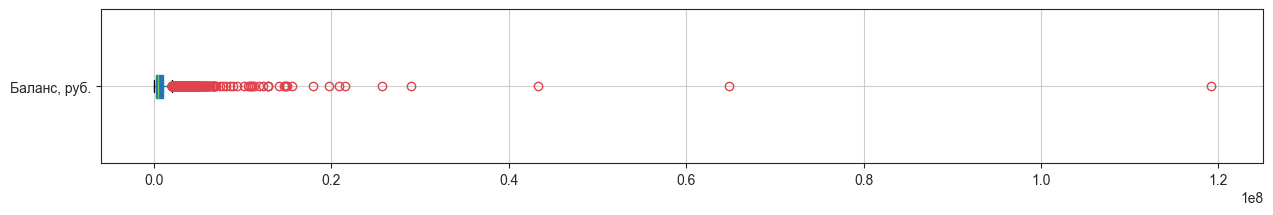

In [89]:
# Диаграмма размаха
ax=bank_data.boxplot('balance', vert=False, figsize=(15,2), patch_artist=True, 
    flierprops=dict(markeredgecolor="#e0434b"), medianprops=dict(color='#71c451'))
ax.set_yticklabels(['Баланс, руб.'])
plt.show()

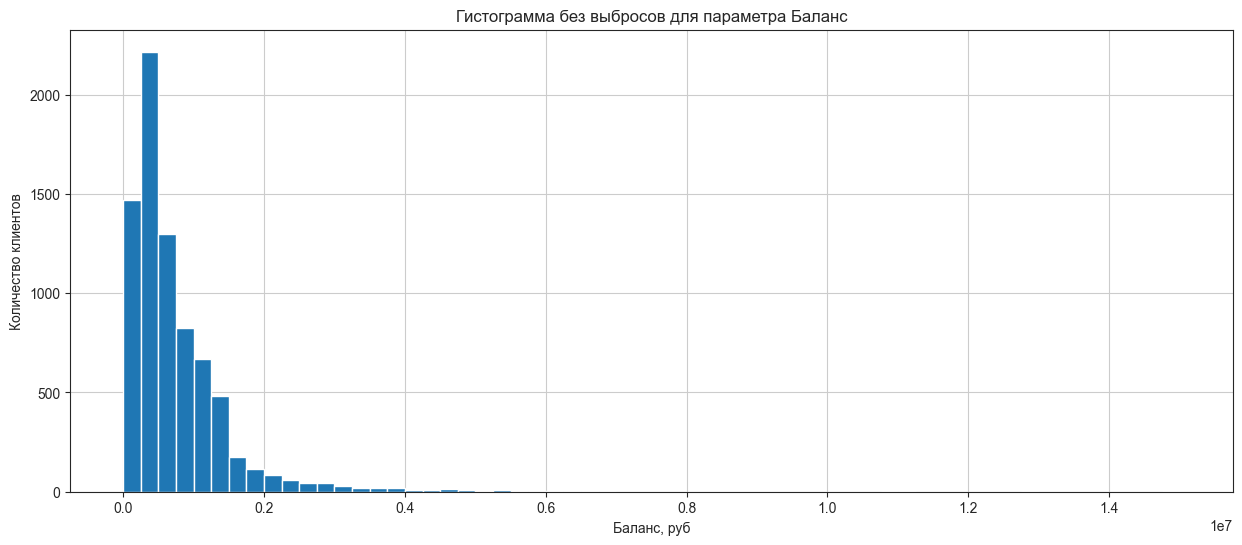

In [90]:
# Удаляем выбросы и проверяем на диаграмме
(
    bank_data
    .query('34.16 < = balance <= 15479853.07')
).balance.hist(bins=60, figsize = (15,6))
plt.xlabel('Баланс, руб')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма без выбросов для параметра Баланс')
plt.show()

#### Заработная плата

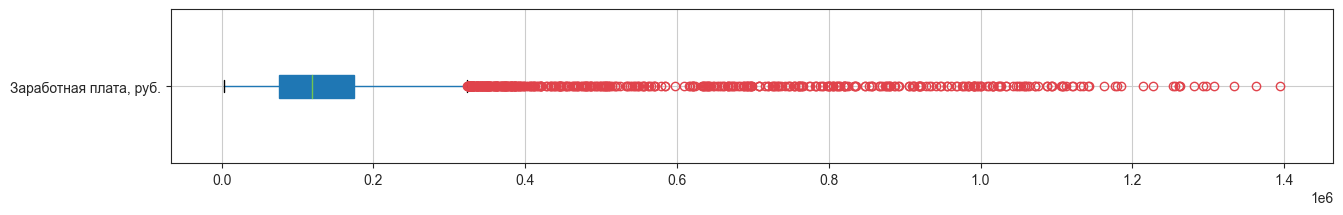

In [91]:
# Диаграмма размаха
ax=bank_data.boxplot('est_salary', vert=False, figsize=(15,2), patch_artist=True, 
    flierprops=dict(markeredgecolor="#e0434b"), medianprops=dict(color='#71c451'))
ax.set_yticklabels(['Заработная плата, руб.'])
plt.show()

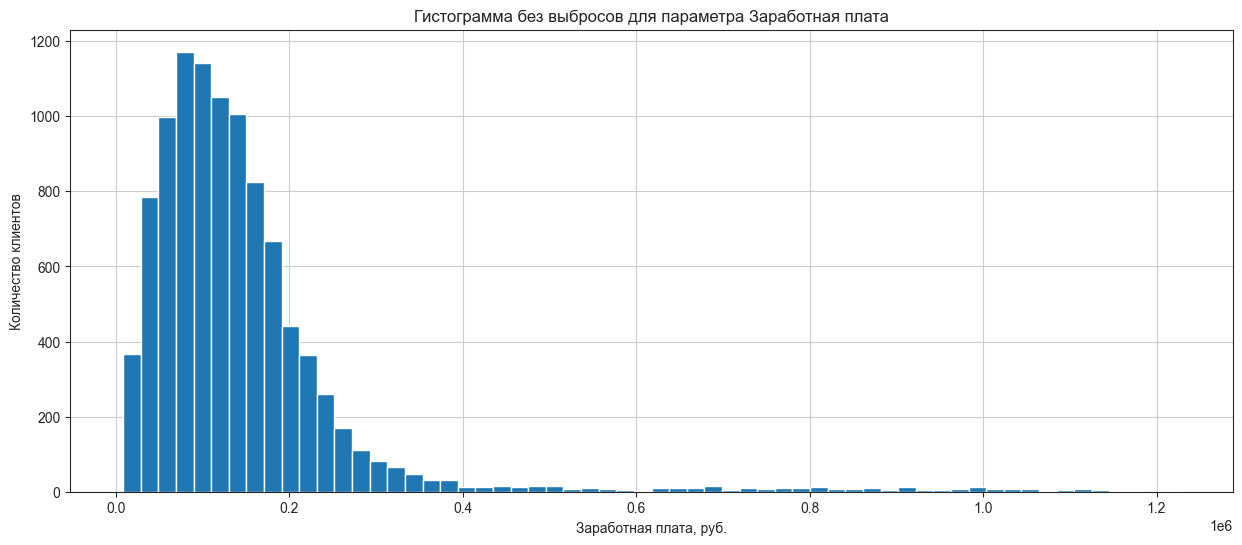

In [92]:
# Удаляем выбросы и проверяем на диаграмме
(
    bank_data
    .query('8703.52 <= est_salary <= 1227809.57')
).est_salary.hist(bins=60, figsize = (15,6))
plt.xlabel('Заработная плата, руб.')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма без выбросов для параметра Заработная плата')
plt.show()

In [93]:
# Убираем выбросы из датасета
bank_balance_em =  bank_data.query('balance < 34.16 or balance > 15479853.07').balance
bank_data = bank_data.query('balance not in @bank_balance_em')

In [94]:
# Убираем выбросы из датасета
bank_data = (
    bank_data
    .query('8703.52 <= est_salary <= 1227809.57')
    .reset_index(drop=True)
)

In [95]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9930 non-null   int64  
 1   score          9930 non-null   float64
 2   city           9930 non-null   object 
 3   gender         9930 non-null   object 
 4   age            9930 non-null   float64
 5   equity         9930 non-null   int64  
 6   balance        7658 non-null   float64
 7   products       9930 non-null   int64  
 8   credit_card    9930 non-null   int64  
 9   last_activity  9930 non-null   int64  
 10  est_salary     9930 non-null   float64
 11  churn          9930 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 931.1+ KB


In [96]:
# Проверка после очистки от выбросов, дубликатов и пустых значений
print('Потеря данных: ',round((100 - len(bank_data)/bank_data_count * 100),2),'%')

Потеря данных:  0.7 %


### Приведение типов данных в столбцах

In [97]:
# Меняем типы данных на целочисленное
bank_data.score = bank_data.score.astype('int')
bank_data.age = bank_data.age.astype('int')

In [98]:
 # Меняем типы данных на boolean
bank_data['credit_card'] = bank_data['credit_card'].astype('bool')
bank_data['last_activity'] = bank_data['last_activity'].astype('bool')
bank_data['churn'] = bank_data['churn'].astype('bool')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9930 non-null   int64  
 1   score          9930 non-null   int64  
 2   city           9930 non-null   object 
 3   gender         9930 non-null   object 
 4   age            9930 non-null   int64  
 5   equity         9930 non-null   int64  
 6   balance        7658 non-null   float64
 7   products       9930 non-null   int64  
 8   credit_card    9930 non-null   bool   
 9   last_activity  9930 non-null   bool   
 10  est_salary     9930 non-null   float64
 11  churn          9930 non-null   bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 727.4+ KB


### Категоризация данных

Датасет содержит следующие неупорядочные категории: city, gender. Для анализа данных выделим еще 1 категорию из поля age среди ушедших.

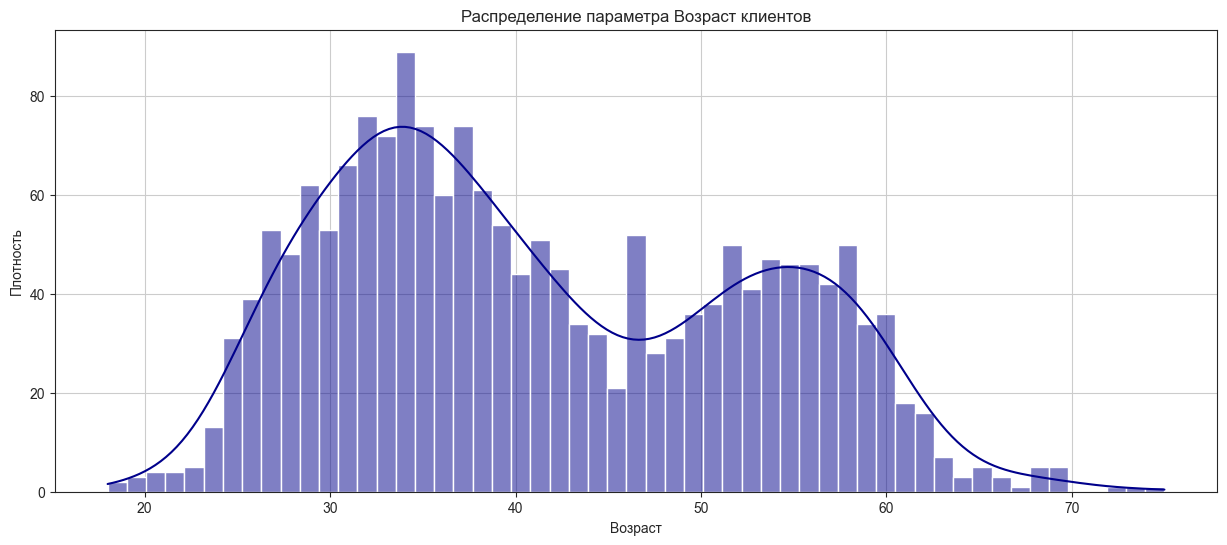

In [99]:
# Текущее распределение age
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(bank_data[bank_data.churn == 1].age, kde=True, bins=55, color = 'darkblue', linewidth=1);
plt.title('Распределение параметра Возраст клиентов')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.grid()
plt.show()

Характерные черты жизненного цикла:

1) Молодежь (18-23 года): студенты, лица впервые нанимающиеся на работу; более взрослые люди, готовящиеся вступить в брак.

2) Молодые люди, недавно образовавшие семью (24-33 лет): люди, впервые покупающие дом и потребительские товары длительного пользования.

3) Семья «со стажем» (34-45 лет): люди со сложившейся карьерой, но ограниченной свободой финансовых действий. Первоочередные цели – улучшение жилищных условий, обеспечение финансовой защиты семьи, предоставление образования детям.

4) Лица «зрелого возраста» (46-61 лет): у людей этой категории наблюдается рост дохода по мере снижения финансовых обязательств. Важная цель – планирование пенсионного обеспечения.

5) Лица, готовящиеся к уходу на пенсию (62 и более лет). Люди имеют накопленный капитал и стремятся обеспечить его сохранность и получить настоящий устойчивый доход.

In [100]:
# Возьмем функцию из курса для распределения клиентов по возрастным группам
def age_group(age):
    if 23 >= age >= 18:
        return '18-23'
    elif 33 >= age >= 24:
        return '24-33'
    elif 45 >= age >= 34:
        return '34-45'
    elif 61 >= age >= 46:
        return '46-62'
    elif 62 <= age:
        return '62+'  

In [101]:
# Применим функцию age_group и добавим новый столбец с категориальным признаком
bank_data['age_group'] = bank_data['age'].apply(age_group)
bank_data.age_group.unique()

array(['24-33', '34-45', '46-62', '62+', '18-23'], dtype=object)

### Кодирование переменных

Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить one-hot кодирование, проще всего это сделать при помощи pandas.get_dummies(). Чтобы при этом не потерять оригинальный столбец сделаем его копию.

In [102]:
# Создадим копии категориальных столбцов city, gender, age_group
bank_data['city_group']=bank_data['city']
bank_data['gender_group']=bank_data['gender']
bank_data['age_group_2']=bank_data['age_group']
bank_data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_group,city_group,gender_group,age_group_2
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,75719.14,True,24-33,Рыбинск,Ж,24-33
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,86621.77,False,34-45,Рыбинск,Ж,34-45
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,107683.34,False,24-33,Рыбинск,Ж,24-33
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,174423.53,True,46-62,Ярославль,Ж,46-62
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,67353.16,True,34-45,Ярославль,М,34-45


In [103]:
# Кодируем данные в столбцах city_group, gender_group, age_group_2
bank_data = pd.get_dummies(bank_data, columns = ['city_group', 'gender_group','age_group_2'])
bank_data = bank_data.rename (
    columns = ({
        'city_group_Ростов':'Ростов', 'city_group_Рыбинск':'Рыбинск','city_group_Ярославль':'Ярославль', 
        'gender_group_Ж':'female', 'gender_group_М':'male',
        'age_group_2_18-23':'18-23','age_group_2_24-33':'24-33','age_group_2_34-45':'34-45',
        'age_group_2_46-62':'46-62','age_group_2_62+':'62+',}))
display (bank_data.head())

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,18-23,24-33,34-45,46-62,62+
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,False,True,...,0,1,0,1,0,0,1,0,0,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,True,False,...,0,1,0,1,0,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,True,True,...,0,1,0,1,0,0,1,0,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,False,True,...,0,0,1,1,0,0,0,0,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,True,False,...,0,0,1,0,1,0,0,1,0,0


### Выводы

В рамках этапа преобработки данных удалось:

    1) Привести названия столбцов исходного дата сета к единому формату;
    2) Убрать пропуски в столбце с указанием возраста клиента;
    3) Избавиться от дубликатов возникших в процессе агрегации данных 2 филиалов банка;
    4) Исключить выбросы по полям с данными по заработной плате и текущему балансу;
    5) Выделить категории по возрасту клиентов;
    6) Закодировать категориальные данные по городу, полу и возрасту для дальнейшего расчета корреляции и поиска зависимости между параметрами.  

##  Исследовательский анализ данных

### Портрет клиента

In [104]:
#Рассмотрим средние значения и стандартные отклонения датасета
bank_data.loc[:,['score','age','equity','balance','products','est_salary']].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
score,9930.0,849.0,65.0,642.0,802.0,853.0,899.0,1000.0
age,9930.0,43.0,12.0,18.0,33.0,40.0,51.0,86.0
equity,9930.0,3.0,2.0,0.0,0.0,3.0,4.0,9.0
balance,7658.0,775603.0,936248.0,38.0,296719.0,524575.0,977435.0,15004496.0
products,9930.0,2.0,1.0,1.0,1.0,2.0,2.0,5.0
est_salary,9930.0,146243.0,132418.0,8708.0,75376.0,119597.0,174408.0,1226911.0


Зафиксируем меры центральной тендеции датасета:
- баллы кредитного скоринга: 849;
- возраст: 43;
- количество баллов собственности: 3;
- баланс (медиана): 524575;
- количество продуктов: 2;
- заработанная плата клианта: 146231.
И рассмотрим меры центральной тенденции в разрезе признака оттока.

In [105]:
# Сводная таблица по критерию - отток 
churn_pivot = (
    bank_data
    .groupby('churn')
    .agg(userid=('userid', 'count'),
        est_salary_mean=('est_salary', 'mean'),
        est_salary_median=('est_salary', 'median'),
        age=('age', 'mean'),
        score=('score', 'mean'),
        balance_mean=('balance', 'mean'),
        balance_median=('balance', 'median'),
        products=('products', 'median'),
        equity=('equity', 'median'),
        city=('city', pd.Series.mode),
        gender=('gender', pd.Series.mode),
        credit_card=('credit_card', pd.Series.mode),
        last_activity=('last_activity', pd.Series.mode)
        )
    .reset_index()
)

# Переименование столбцов
churn_pivot = churn_pivot.rename(columns={
    'age': 'Средний возраст',
    'city': 'Мода по городу',
    'credit_card': 'Мода по наличию карты',
    'equity': 'Медианное количество собственности',
    'est_salary_mean': 'Средняя запрлата',
    'est_salary_median': 'Медианная запрлата',
    'score': 'Средний бал кредитного рейтинга',
    'gender':'Мода по полу',
    'products':'Медианное количество продуктов',
    'balance_median':'Медианна клиентского баланса',
    'balance_mean':'Средний баланс клиентов',
    'userid': 'Количество записей',
    'last_activity': 'Мода по активности'})

# Делаем из сводной таблицы датасет
churn_pivot = (
    churn_pivot.T
    .reset_index()
    .sort_values(by='index')
    .reset_index(drop=True)
)

# Переименование столбцов
churn_pivot = churn_pivot.rename(columns={
    'index': 'Мера',
    False: 'Лояльность',
    True: 'Отток'
})
churn_pivot = churn_pivot[churn_pivot['Мера'] != 'churn']

# Заполняем столбец 'Относительная разница'
churn_pivot['Относительная разница'] = ''
for i, row in churn_pivot.iterrows():
      if row['Мера'].startswith('Мода') and row['Лояльность'] == row['Отток']: 
          churn_pivot['Относительная разница'][i] = 'Нет изменений'
      elif row['Мера'].startswith('Мода'): 
          churn_pivot['Относительная разница'][i] = 'Есть изменения'
      else: 
          churn_pivot['Относительная разница'][i] = ((row['Отток'] / row['Лояльность']))
churn_pivot.head(15)


,Мера,Лояльность,Отток,Относительная разница
1,Количество записей,8117,1813,0.223358
2,Медианна клиентского баланса,475636.05,780671.46,1.641321
3,Медианная запрлата,118221.67,125395.22,1.060679
4,Медианное количество продуктов,2,2,1.0
5,Медианное количество собственности,3,4,1.333333
6,Мода по активности,False,True,Есть изменения
7,Мода по городу,Ярославль,Ярославль,Нет изменений
8,Мода по наличию карты,True,True,Нет изменений
9,Мода по полу,Ж,М,Есть изменения
10,Средний бал кредитного рейтинга,845.3829,863.225593,1.021106


Анализ двух относительно разных по размеру групп дает представление о мерах центральной тенденции. 

Статистические различия наблюдаются: 
- баланс;
- количество балов собственности;
- пол;
- активность пользователей;
- наличие карты.

Рассмотрим влияние меры на каждый показатель более детально.

#### Влияние кредитного скоринга (рейтинга) на отток

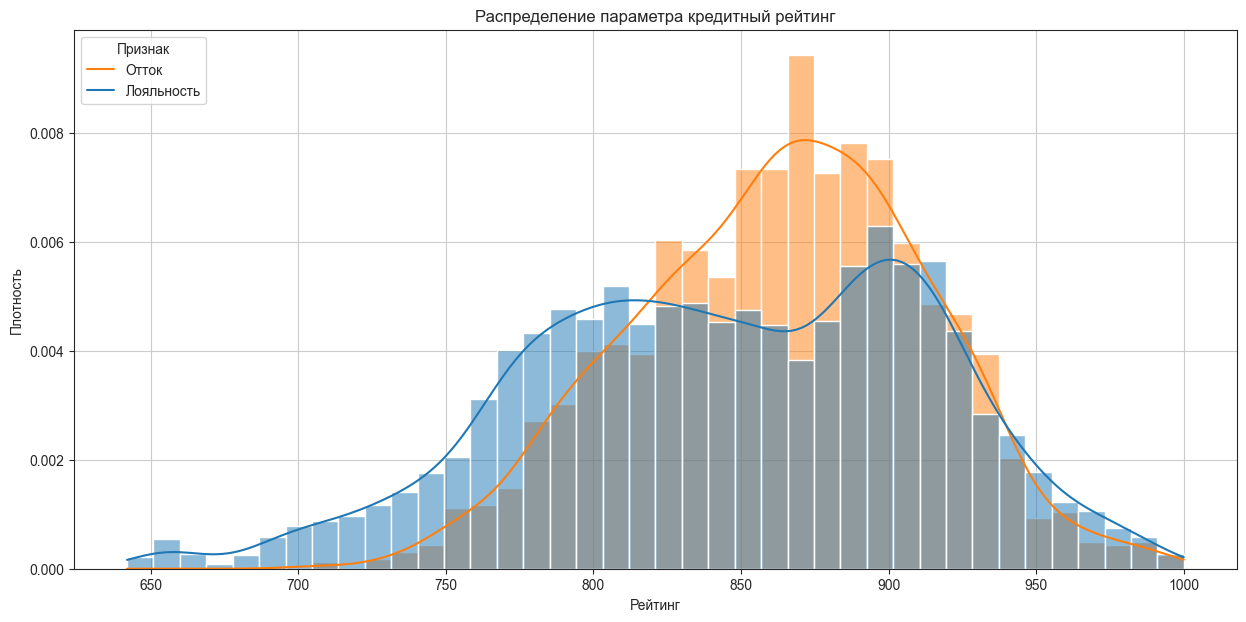

In [106]:
# Гистогрмма распределения рейтинга
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=bank_data, x="score", kde=True, hue="churn", linewidth=1, stat="density", common_norm=False )
plt.title('Распределение параметра кредитный рейтинг')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.legend(title='Признак', loc='upper left', labels=['Отток', 'Лояльность'])
plt.grid()
plt.show()

Отток больше у клиентов с рейтингом 830 - 940. 

#### Влияние локации на отток клиентов

In [107]:
# Выбираем данные для диаграммы
bank_city = ( 
    bank_data
    .groupby('city').userid
    .count()
    .sort_values(ascending=False)
    .reset_index()
)

In [108]:
# Строим круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=bank_city.city, values=bank_city.userid)], 
          layout=go.Layout(title=go.layout.Title(text="Распределения клиентов по городам")))
fig.update_layout(
                width=800, 
                height=500,
                annotations=[dict(x=1.15, y=1.05, text='Город:',showarrow=False)]
)
fig.show()

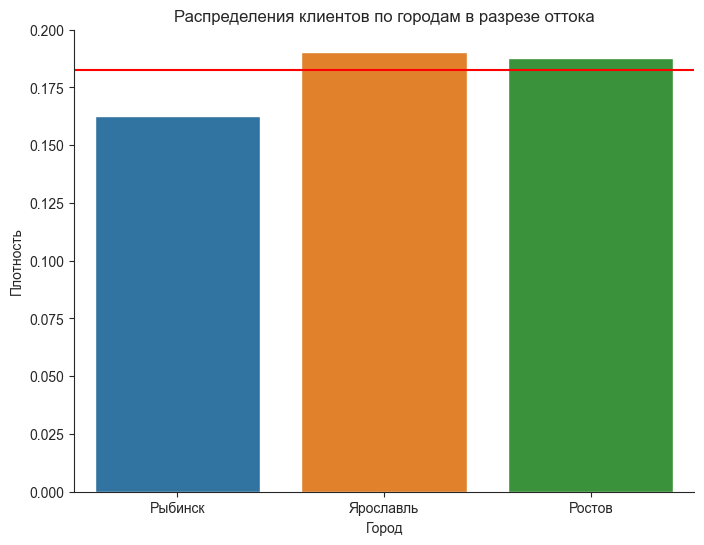

In [109]:
# Распределения клиентов по городам в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="city", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределения клиентов по городам в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Город')
sns.despine();
plt.show()

Самая большая клиентская база в городе Ярославь, 58.8%, но при этом в среднем по всем городам отток не превышает 20%.

#### Влияние гендерного признака на отток

In [110]:
# Строим диаграмму распределения по гендерному признаку
fig = go.Figure(data=[go.Pie(labels=['женский', 'мужской'], values=[len(bank_data.query('gender == "Ж"')), 
                                                                      len(bank_data.query('gender == "М"'))])])
fig.update_layout(
                title='Распределение клиентов по гендерному признаку', 
                width=800, 
                height=500,
                annotations=[dict(x=1.15, y=1.05, text='Пол клиента:',showarrow=False)]
)
fig.show()

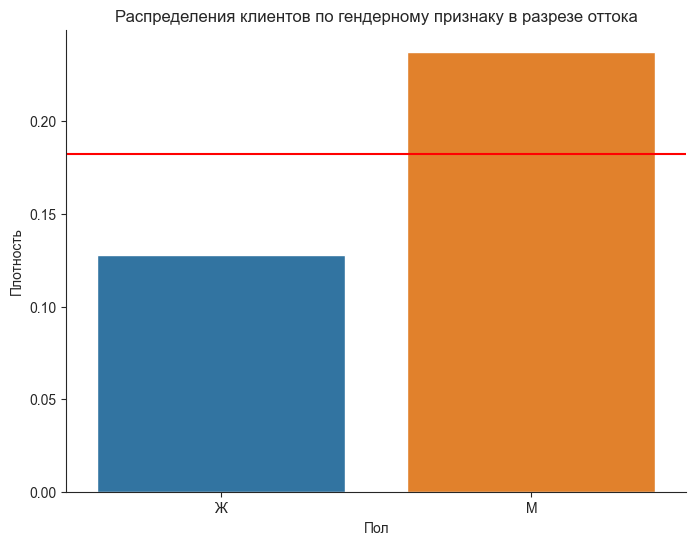

In [111]:
# Распределения клиентов по гендерному признаку в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="gender", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределения клиентов по гендерному признаку в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Пол')
sns.despine();
plt.show()

Соотношение клиентов банка по гендерному признаку 1 к 1, но при этом наблюдается больший отток клиентов - мужчин.

#### Влияние возраста клиентов на отток

In [112]:
# Выберем данные для анализа по возрастным группам
bank_age = (
    bank_data
    .groupby('age_group')['userid']
    .count()
    .reset_index()
)

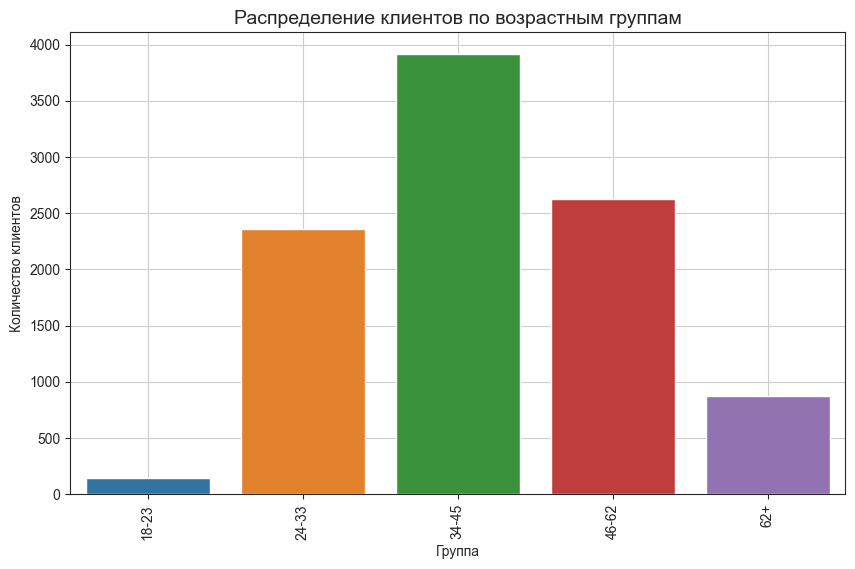

In [113]:
# Диаграмма распределения по возрастным группам
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.barplot(x='age_group', 
            y='userid', 
            data=bank_age) 
plt.title('Распределение клиентов по возрастным группам', fontsize=14)
plt.ylabel('Количество клиентов')
plt.xlabel('Группа')
plt.xticks(rotation=90)
plt.grid()
plt.show();

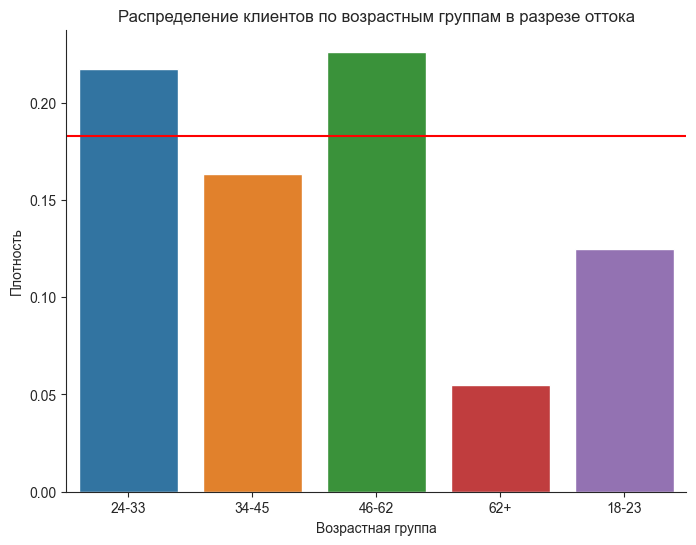

In [114]:
# Распределения клиентов по гендерному признаку в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="age_group", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределение клиентов по возрастным группам в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Возрастная группа')
sns.despine();
plt.show()

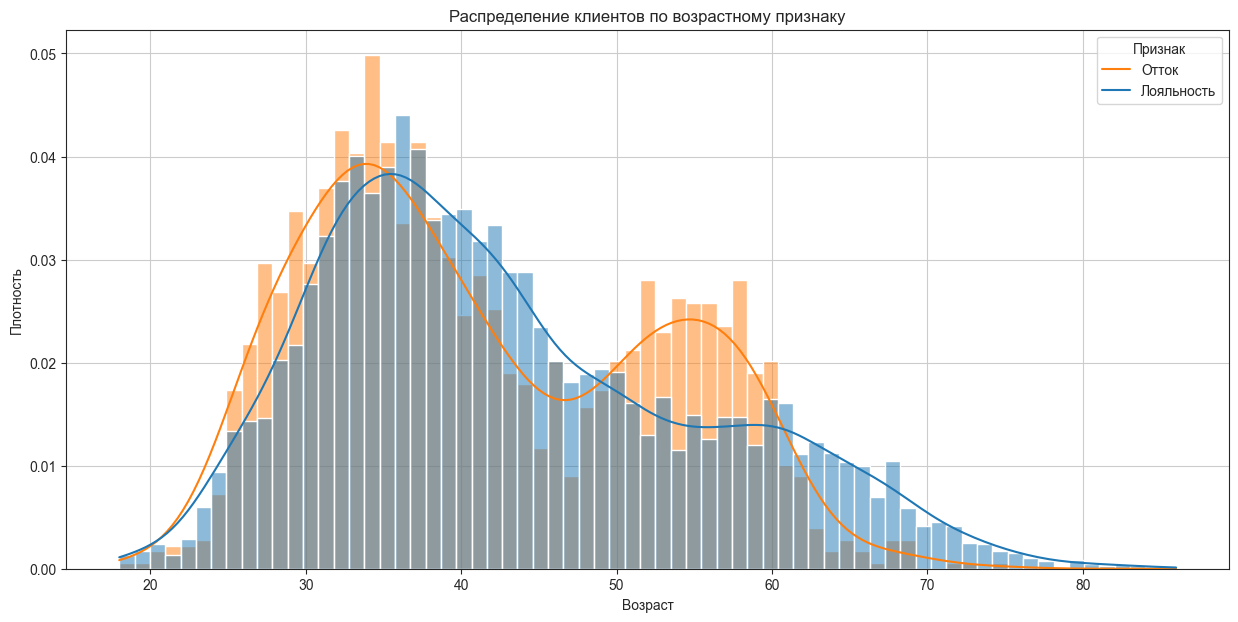

In [115]:
# Гистогрмма распределения клиентов по возрасту
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=bank_data, x="age", kde=True, hue="churn", bins=69, linewidth=1, stat="density", common_norm=False )
plt.title('Распределение клиентов по возрастному признаку')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend(title='Признак', loc='upper right', labels=['Отток', 'Лояльность'])
plt.grid()
plt.show()

Анализ возраста клиента и оттока показал:
- 34-45 лет самая большая группа среди клиентов;
- отток клиентов можно наблюдать в группах: 24 - 33 и 46 - 62;
- самый низкий отток среди клиентов группы 62+.

#### Влияние баллов собственности на отток

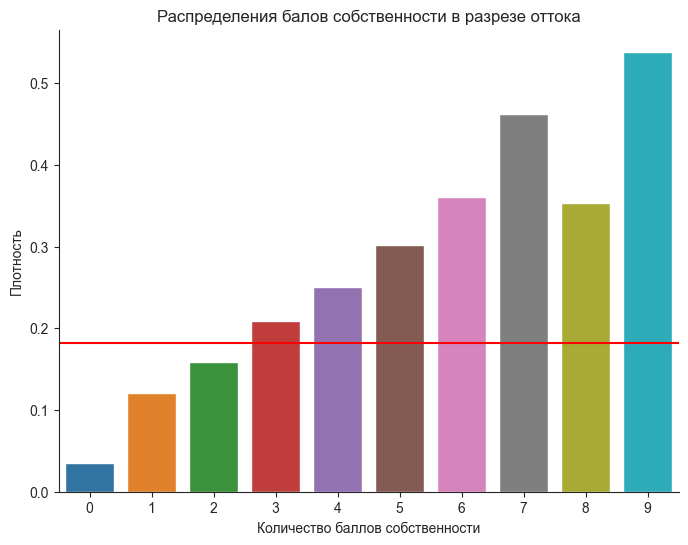

In [116]:
# Распределения количества продуктов в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="equity", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределения балов собственности в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Количество баллов собственности')
sns.despine();
plt.show()

Клиенты с 3-мя и более баллами собственности имеют уровень оттока выше среднего по банку.

#### Влияние баланса на клиентских счетах на отток

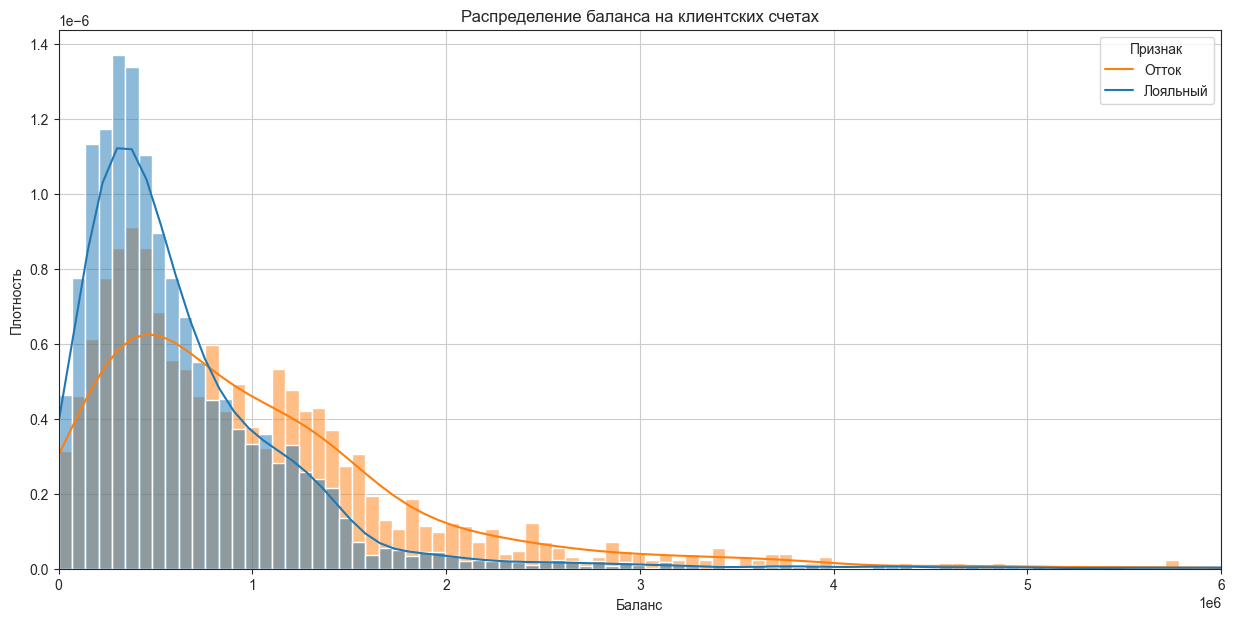

In [117]:
# Гистогрмма распределения средств на клиентских счетах
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=bank_data[bank_data.balance > 0], x="balance", kde=True, hue="churn", linewidth=1, stat="density", 
             common_norm=False )
plt.title('Распределение баланса на клиентских счетах')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.legend(title='Признак', loc='upper right', labels=['Отток', 'Лояльный'])
plt.xlim(0,6000000)
plt.grid()
plt.show()

Баланс является ключевым параметром указывающий на отток клиентов. На графике четко обозначен тренд: клиенты имеющие на счетах больше 750К имеют высокую вероятность оттока, что для любого банка является чувствительным моментом требующий тщательной поработки для удержания клиентов.

#### Влияние количества продуктов на отток

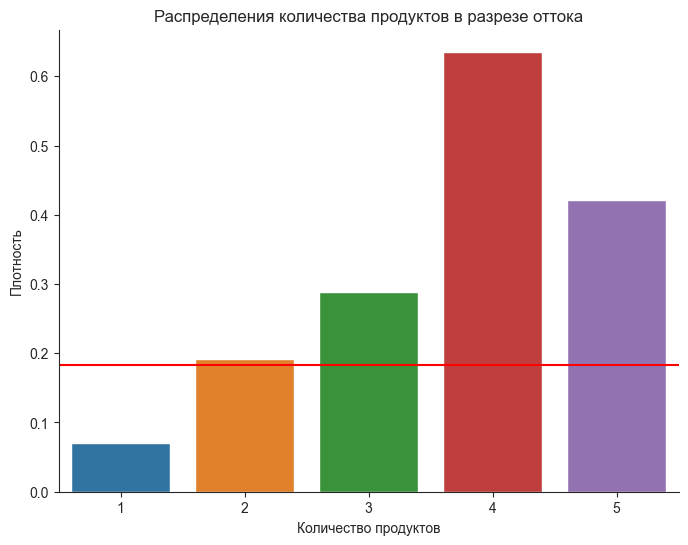

In [118]:
# Распределения количества продуктов в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="products", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределения количества продуктов в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Количество продуктов')
sns.despine();
plt.show()

Клиенты с 3-мя и более продуктами имеют уровень оттока выше среднего по банку.

#### Влияние наличие кредитных карт на отток

In [119]:
# Строим диаграмму распределения по наличию кредитной карты
fig = go.Figure(data=[go.Pie(labels=['Есть кредитная карта', 'Нет кредитной карты'], 
            values=[len(bank_data.query('credit_card == True')), len(bank_data.query('credit_card == False'))])])
fig.update_layout(
                title='Распределение клиентов по наличию кредитной карты', 
                width=800, 
                height=500,
                annotations=[dict(x=1.15, y=1.05, text='Наличие карты:',showarrow=False)]
)
fig.show()

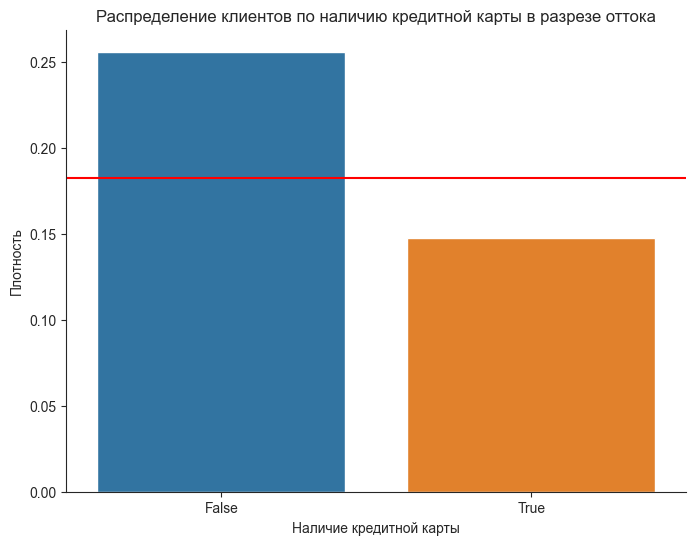

In [120]:
# Распределение клиентов по наличию кредитной карты в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="credit_card", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределение клиентов по наличию кредитной карты в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Наличие кредитной карты')
sns.despine();
plt.show()

68% клиентов банка имеют кредитные карты. Отток клиентов с кредитными картами меньше, чем без кредитных карт.

#### Влияние размера заработной платы на отток

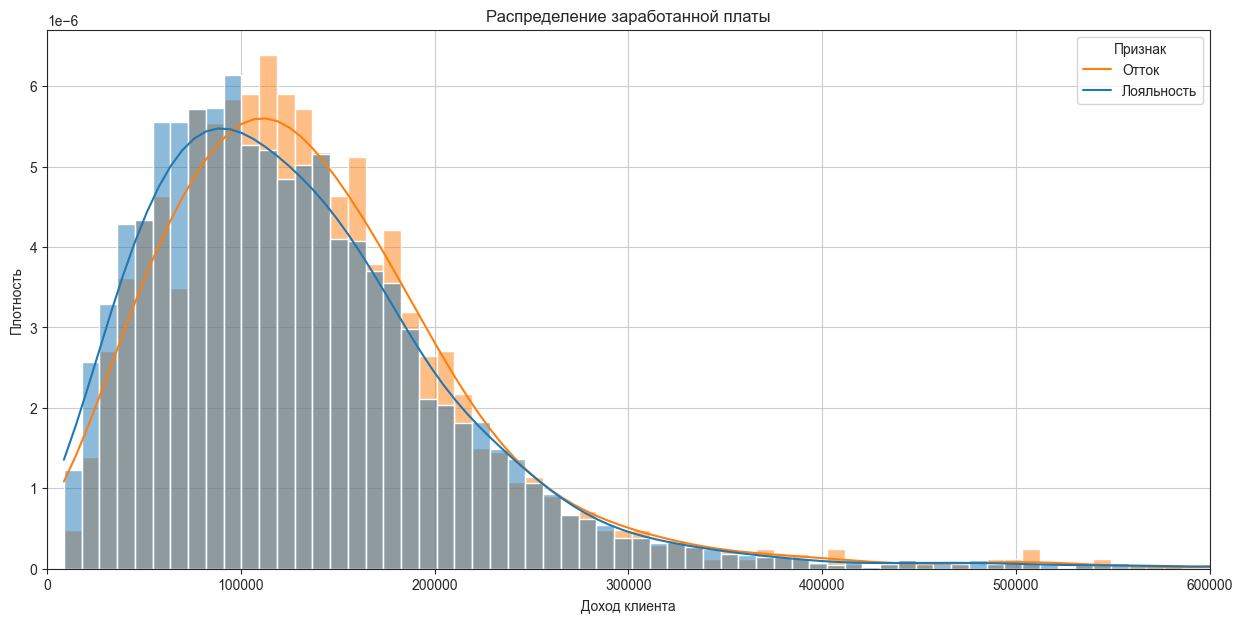

In [121]:
# Гистогрмма распределения параметра - размер заработанной платы в разрезе оттока
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=bank_data, x="est_salary", kde=True, hue="churn", linewidth=1, stat="density", common_norm=False )
plt.title('Распределение заработанной платы')
plt.xlabel('Доход клиента')
plt.ylabel('Плотность')
plt.legend(title='Признак', loc='upper right', labels=['Отток', 'Лояльность'])
plt.xlim(0,600000)
plt.grid()
plt.show()

Анализ распределения доходов клиентов показал, что клиенты с доходом от 100К до 220К имеют высокий процент оттока, а больше 220К динамика выравнивается, что так же является негативным признаком.

#### Влияние активности клиентов на отток

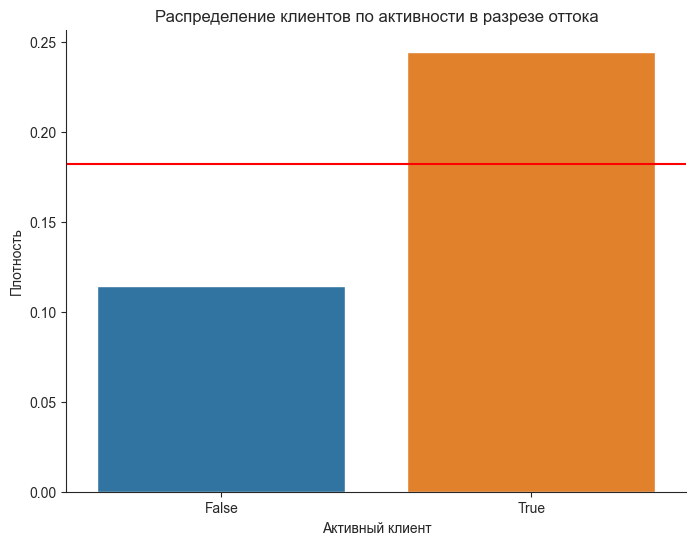

In [122]:
# Распределение клиентов по активности в разрезе оттока
plt.figure(figsize=(8,6))
sns.barplot(data=bank_data, x="last_activity", y="churn", ci=None)
plt.axhline(y=np.mean(bank_data.churn), color='r')
plt.title('Распределение клиентов по активности в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Активный клиент')
sns.despine();
plt.show()

Среди клиентов банка отток выше у активных клиентов.

### Корреляционный анализ

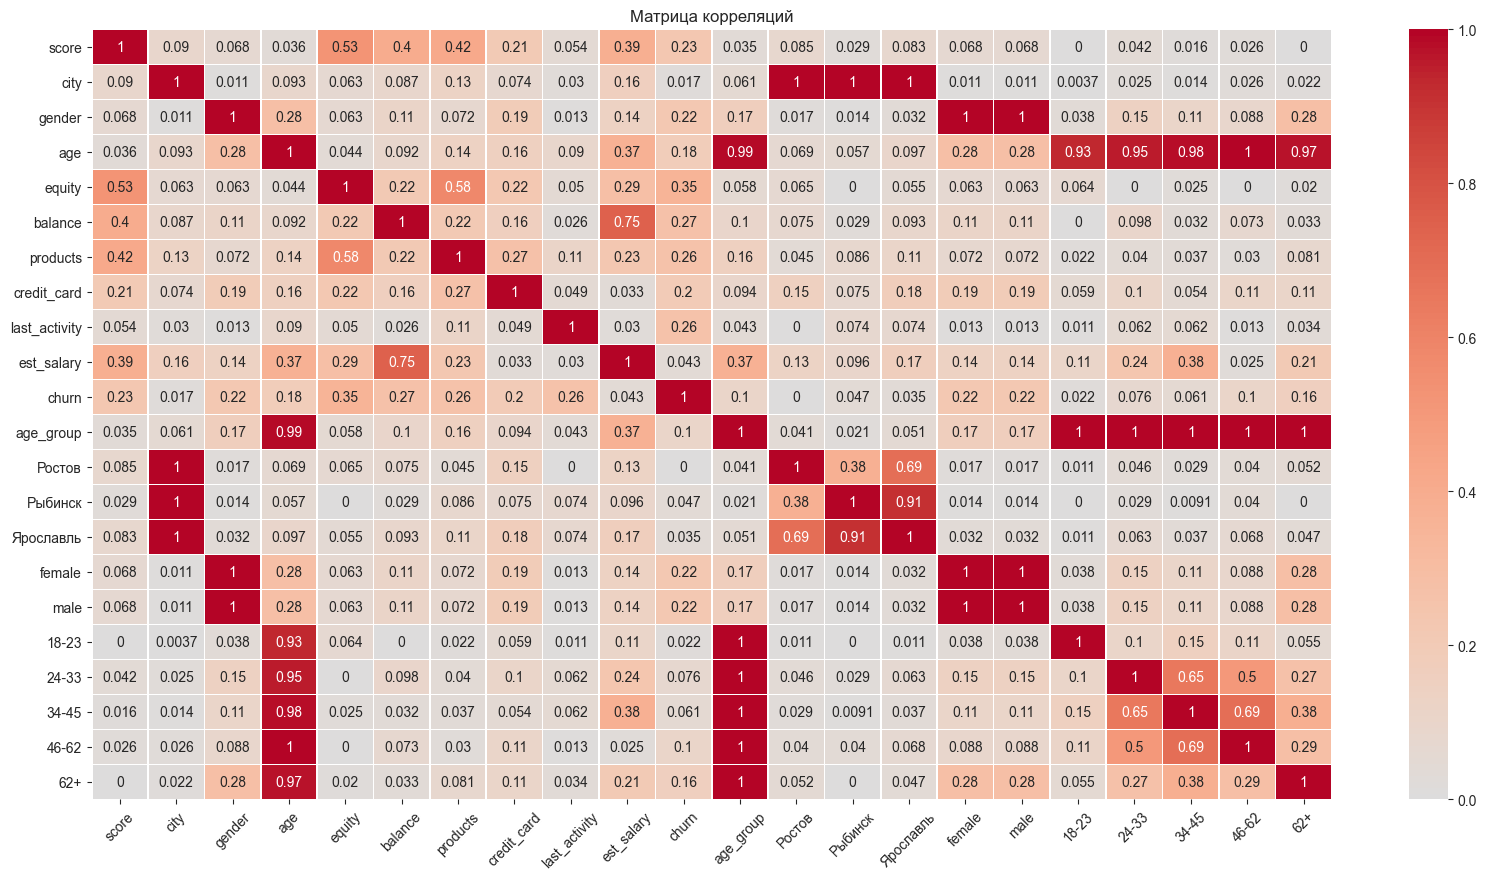

In [123]:
# Матрица корреляции
interval_columns = ['balance', 'est_salary', 'age', 'score']
matrix = bank_data.copy()
matrix.drop(columns='userid', inplace=True)
matrix = matrix.phik_matrix(interval_cols=interval_columns)
plt.figure(figsize=(20,10))
sns.heatmap (data = matrix, linewidths=.5, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.xticks(rotation = 45)
plt.show()

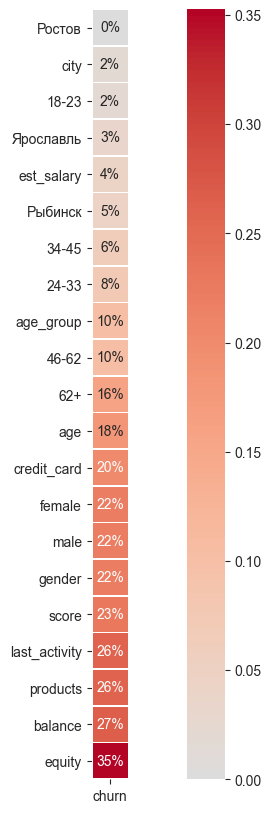

In [124]:
# Отдельно выделим корреляцию признака оттока
plt.figure(figsize=(15,10))
sns.heatmap (matrix[['churn']].drop('churn').sort_values('churn'), linewidths=.5, annot=True, 
             fmt=".0%", cmap='coolwarm', square=True, center=0);
plt.show()

Согласно шкале Чеддона признак оттока клиентов имеет следующие зависимости:
+ 0,1 - 0,3,  слабая: возраст, наличие кредитной карты, пол, кредитный рейтинг, активность клиента, количество продуктов, баланс.
+ 0,3 - 0,5, умеренная: количество балов собственности.

Обратим внимание на корреляцию следующих параметров:
- баллы кредитного рейтинга и количество баллов собственности - 0.53;
- количество баллов собственности и количество продуктов - 0.58;
- баланс клиента и заработанная плата - 0.75.

## Проверка статистических гипотез

Т-тест (t-test) является статистическим методом, предназначенным для сравнения средних значений двух выборок и определения, насколько вероятно различие между ними является случайным или статистически значимым. Для использования Т-теста необходимо выполнения ряда условий:

1. Независимые выборки: Когда мы хотим сравнить средние двух независимых выборок, полученные в разных тестах. Здесь мы предполагаем, что наблюдения в одной группе не связаны с наблюдениями в другой группе.

2. Приближенно нормальное распределение: Т-тест хорошо работает, когда данные в выборках приближаются к нормальному распределению. Если объемы выборок достаточно велики (обычно, более 30 наблюдений), то Т-тест может быть устойчив к нарушению нормальности.

3. Ограниченное количество выбросов: Т-тест устойчив к небольшому количеству выбросов в данных. Однако, если выбросы существенно влияют на распределение, то Т-тест может дать неверные результаты.

4. Нормальность разностей: Когда рассматривается зависимая переменная до и после некоторого воздействия (например, до и после лечения), разности между соответствующими наблюдениями должны быть приближены к нормальному распределению.


Что касается наших данных Т-тест не применим к категориальным признакам, таким как город, пол, наличие кредитной карты, активный клиент и другие, так как этот метод предназначен для сравнения числовых значений между группами. Для категориальных признаков можно использовать другие статистические методы, такие как Хи-квадрат или анализ дисперсии для сравнения категорий между группами.

Сформируем гипотезы для следующих критериев:

1) Средний доход клиента;

2) Количество продуктов у клиентов.

### Сформулируем и проверим статистическую гипотезу №1

    H0: Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.
    H1: Средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.

In [125]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(bank_data[bank_data['churn']==0]['est_salary'],
                       bank_data[bank_data['churn']==1]['est_salary'],
                       equal_var=False)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# вывод значения p-value на экран 
print(results.pvalue)
# анализ результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.7730680307072629
Не получилось отвергнуть нулевую гипотезу


Средний доход ушедших и текущих клиентов сопоставимы. 

### Сформулируем и проверим статистическую гипотезу №2

    H0: Среднее количество продуктов клиентов, которые ушли, равен среднему количеству продуктов клиентов, которые остались.
    H1: Среднее количество продуктов клиентов, которые ушли, не равен среднему количеству продуктов клиентов, которые остались.

In [126]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(bank_data[bank_data['churn']==0]['products'],
                       bank_data[bank_data['churn']==1]['products'],
                       equal_var=False)
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# вывод значения p-value на экран 
print(results.pvalue)
# анализ результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

1.8370913642797365e-139
Отвергаем нулевую гипотезу


Среднее количество продуктов ушедших и оставшихся клиентов не равны.

## Подведение промежуточных итогов по результатам анализа и проверки статистических гипотез.

1.  Среднестатистический клиент банка:
    - возраст 43 года;
    - имеет 3 балла собственности, 2 продукта и кредитный скорринг 849;
    - зарабатывает в среднем 146231 руб и имеет на счете 524575 рублей.
2. Портрет клиента подверженного оттоку:
    - возраст 41 года;
    - имеет 4 балла собственности, 2 продукта и кредитный скорринг 863;
    - зарабатывает в среднем 146984 руб и имеет на счете 780671.46 рублей.
3. На отток больше всего оказывают влияние следующие факторы:
    - количество балов собственности;
    - баланс клиента;
    - количество продуктов;
    - кредитный рейтинг;
    - активность клиента;
    - пол клиента;
    - возраст клиента.
3. Клиенты с кредитным рейтингом 830 - 940 подвержены оттоку.
4. Больше всего клиентов у банка в городе Ярославль - 58.8%. Уровень оттока клиентов в городах присутсвия не превышает 20%, при этом размер клиентской базы конкретного города не вляет на показатель оттока.
5. Среди клиентов банка нет сильной градации по гендерному признаку, но среди мужского населения наблюдается больший отток клиентов.
6. Анализ возраста клиента и оттока показал:
    - 34-45 лет самая большая группа среди клиентов;
    - отток клиентов можно наблюдать в группах: 24 - 33 и 46-62;
    - самый низкий отток среди клиентов группы 62+.
7. Клиенты с 3-мя и более баллами собственности имеют уровень оттока выше среднего по банку.
8. Клиенты с балансом больше 750К имеют тенденцию к оттоку.
9. Клиенты с 3-мя и более продуктами имеют уровень оттока выше среднего по банку.
10. 68% клиентов банка имеют кредитные карты. Отток клиентов с кредитными картами меньше, чем без кредитных карт.
11. Клиенты с доходом от 100К до 220К имеют высокий процент оттока, а больше 220К динамика выравнивается, что так же является негативным признаком.
12. Большая часть клиентов банка - не активные, но отток клиентов больше у активных клиентов.
12. При сравнении различных показателей можно выделить следующие закономерности высокой корреляции:
    - баллы кредитного рейтинга и количество баллов собственности - 0.53;
    - количество баллов собственности и количество продуктов - 0.58;
    - баланс клиента и заработанная плата - 0.75.
13. В статистических тестах подтвердились данные полученные в исследовательском анализе данных:
    - Средний доход ушедших и текущих клиентов сопоставимы.
    - Среднее количество продуктов ушедши и оставшихся клиентов не равны.
 

## Приоритизация признаков и сегментация пользователей

Приоритизация гипотез - это процесс определения наиболее важных и перспективных гипотез для тестирования. Логика приоритизации гипотез заключается в том, чтобы выделить те гипотезы, которые обладают наибольшим потенциалом для достижения целей или улучшения ситуации с оттоком клиентов в банке.

В приоритизации будем отталкиваться от результатов корреляции признаков и выявленных значений оттока для каждого признака:

1) Количество балов собственности: больше 3-х;
2) Баланс: больше 750К;
3) Количество продуктов: больше 3-х; 
4) Активность клиента: Да;
5) Кредитный рейтинг: 830 -940;
6) Наличие кредитной карты: 
7) Возраст: 24 - 33 и 46 - 62;
8) Пол: мужкой.

На основание приоритизации подготовим сценарии:

Сценарий 1.
- Уровень заработнной платы: больше 100К 
- Возраст: больше 30
- Количество продуктов: больше 3-х (основной признак)

Сценарий 2.
- Уровень заработнной платы: 100К - 220К
- Возраст: 46-62 (основной признак)
- Наличие кредитной карты: нет

Сценарий 3.
- Пол: мужской
- Кредитный рейтинг: 830 - 940 (основной признак)

Сценарий 4.
- Пол: мужской (основной признак)
- Наличие кредитной карты: нет
- Возраст: 34-45

Сценарий 5.
- Количество балов собственности: больше 3-х (основной признак)
- Активный клиент
- Пол: мужской

Сценарий 6.
- Наличие кредитной карты: нет (основной признак)
- Количество балов собственности: меньше 3-х

Сценарий 7.
- Возраст: 24-33 (основной признак)
- Кредитный рейтинг: меньше 830
- Количество балов собственности: меньше 3-х

Сценарий 8.
- Возраст: 34-45
- Пол: женский
- Количество продуктов: больше 3-х (основной признак)

Сценарий 9.
- Пол: мужской 
- Активный клиент
- Баланс клиентского счета: больше 750К (основной признак)

Сценарий 10.
- Активный клиент: нет
- Наличие кредитной карты: нет
- Баланс клиентского счета: больше 750К (основной признак)

Цель исследования сценариев:
- Найти группы, где отток выше среднего по банку - 18.26 %.
- Размер группы должен быть больше 500.


In [127]:
# Функция для расчета статистических показателей выборок
# На вход подается датасет и сценарий выборки данных
def bank_clients(dt,qv):
    data = dt.query(qv).agg({
        'userid':'count',
        'churn':'mean',
        'age_group': lambda x: x.mode().iat[0],
        'gender': lambda x: x.mode().iat[0],
        'equity':'median',
        'balance':'median',
        'products': 'median',
        'score':'mean',
        'est_salary':'mean'
        })
    data.name = qv
    return data

In [128]:
# Статистика для сегментов
segments = pd.concat((
    bank_clients(bank_data,'age>=30 & products>=3 & est_salary<=100000'),
    bank_clients(bank_data,'46<=age<=62 & credit_card== 0 & 100000<=est_salary<= 220000'),
    bank_clients(bank_data,'male == 1 & 830<=score<=940'),
    bank_clients(bank_data,'male == 1 & credit_card == 0 & 34<=age<=45'),
    bank_clients(bank_data,'last_activity == 1 & equity>=3 & male == 1'),
    bank_clients(bank_data,'equity<3 & credit_card == 0'),
    bank_clients(bank_data,'24<=age<=33 & score<=830 & equity<3'),
    bank_clients(bank_data,'34<=age<=45 & products>=3 & female == 1'),
    bank_clients(bank_data,'male == 1 & last_activity == 1 & balance>=750000'),
    bank_clients(bank_data,'balance>=750000 & credit_card == 0 & last_activity == 0'))
, axis=1).T.reset_index()

segments = (
    segments[segments.userid > 500]
    .sort_values(by='churn', ascending=False)
    .round(2)
)
# Преобразование данных
segments.userid = segments.userid.astype('int')
segments.equity = segments.equity.astype('int')
segments.products = segments.products.astype('int')
segments.score = segments.score.astype('int')
segments.est_salary = segments.est_salary.astype('int')
segments.balance = segments.balance.astype('int')

# Переименуем столбцы
segments = segments.rename(columns={'userid':'Кол-во пользователей',
                                    'churn':'Доля оттока',
                                    'age_group':'Возростная группа',
                                    'gender':'Пол',
                                    'equity':'Кол-во баллов собственности',
                                    'balance':'Баланс',
                                    'products':'Кол-во продуктов',
                                    'score': 'Кредитный рейтинг',
                                    'est_salary':'Доход'})
segments

,index,Кол-во пользователей,Доля оттока,Возростная группа,Пол,Кол-во баллов собственности,Баланс,Кол-во продуктов,Кредитный рейтинг,Доход
8,male == 1 & last_activity == 1 & balance>=750000,697,0.601148,34-45,М,4,1234343,2,868,182133
4,last_activity == 1 & equity>=3 & male == 1,1398,0.462089,34-45,М,4,688625,2,850,139935
1,46<=age<=62 & credit_card== 0 & 100000<=est_salary<= 220000,513,0.333333,46-62,Ж,3,885277,2,865,148301
3,male == 1 & credit_card == 0 & 34<=age<=45,538,0.304833,34-45,М,4,915959,2,862,184001
2,male == 1 & 830<=score<=940,2731,0.290736,34-45,М,3,733560,2,884,160003
0,age>=30 & products>=3 & est_salary<=100000,556,0.28777,46-62,Ж,4,593301,3,833,64958
9,balance>=750000 & credit_card == 0 & last_activity == 0,543,0.244936,34-45,Ж,4,1283597,2,875,158197
5,equity<3 & credit_card == 0,1046,0.102294,34-45,Ж,0,277903,2,856,146678


Максимальный отток выявлен для следующих сценариев:

Сегмент 1.
- Пол: мужской 
- Активный клиент
- Баланс клиентского счета: больше 750К
- Отток: 60%

Сегмент 2.
- Количество балов собственности: больше 3-х
- Активный клиент
- Пол: мужской
- Отток: 46%

Сегмент 3.
- Уровень заработнной платы: 100К - 220К
- Возраст: 46-62
- Наличие кредитной карты: нет
- Отток: 33%

Если обобщить статистические данные, то можно выделить ряд закономерностей для клиента подверженного оттоку:
- активный клиент, 34 - 62 года;
- хороший средний доход больше 170К и на балансе больше 1.2М;
- количество продуктов: 2;
- кредитный рейтинг больше 850;
- количество баллов собственности 4.

## Рекомендаций по результатом исследования

По результатам исследования можно дать следующие рекомендации для отдела маркетинга.

Сегмент 1:
    
    1. Для пользователей имеющих баланс больше 750К бесплатно предоставить премиальное обслуживание.
    2. Активные пользователи онлайн банкинга будут рады мобильному приложению со всеми услугами банка и интересными акциями.
    3. Скидки на покупки и повышенный кэшбек на такси, рестораны в городе присутствия клиента.
    4. Предоставить возможность бесплатного снятия средств через банкоматы сторонних банков.

Сегмент 2:

    1. Льготное страхование своего здоровья и здоровья родных, собственности.
    2. Полисы ДМС по специальной цене с программой для города присутствия, включая родственников. 
    3. Предоставить возможность открытия вкладов с % выше рынка и гибкими тарифами, например без ограничения пополнения или снятия средств.
    4. Предоставить возможность открытия брокерского счета и покупки активов по льготным ценам на брокерское обслуживание.

Сегмент 3:

    1. Предоставить возможность быстрого получения кредита или кредитной карты по заявке через мобильный банк.
    2. Льготное страхование своего здоровья и здоровья родных, собственности.
    3. Предложить сфокусироваться на финансовом планировании на пенсию и предложить продукты и инвестиционные возможности, которые помогут клиентам обеспечить финансовую стабильность на пенсии.
    4. Уделить особое внимание оценке рисков и безопасности финансовых продуктов, которые предлагает банк, чтобы клиенты чувствовали себя защищенными.